### Data Exploration and Cleanup (basic) script
Our aim here is to understand our dataset and do a basic cleanup removing NaNs & Duplicates.

- Author [Shaurya Uppal](https://www.linkedin.com/in/shaurya-uppal/)

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls

data_analysis_ride_request.html  drive	sample_data


#### Reading DataSet

In [6]:
df = pd.read_csv('/content/drive/MyDrive/ola/raw_data.csv', low_memory = False, compression='gzip')
len(df)

8381556

In [7]:
df.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng
0,2020-03-26 07:07:17,14626,12.313621,76.658195,12.287301,76.602280
1,2020-03-26 07:32:27,85490,12.943947,77.560745,12.954014,77.543770
2,2020-03-26 07:36:44,05408,12.899603,77.587300,12.934780,77.569950
3,2020-03-26 07:38:00,58940,12.918229,77.607544,12.968971,77.636375
4,2020-03-26 07:39:29,05408,12.899490,77.587270,12.934780,77.569950


### A Customer_ID `number` at a particular timestamp can only have one entry
### Removing Duplicate Entries ['ts','number']

In [8]:
df[df.duplicated(subset=['ts','number'],keep=False)]

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng
235,2020-03-26 18:10:35,16795,12.967236,77.641594,13.014504,77.650856
236,2020-03-26 18:10:35,16795,12.967236,77.641594,13.014504,77.650856
407,2020-03-26 21:35:50,65856,12.917173,77.586400,12.913940,77.685280
408,2020-03-26 21:35:50,65856,12.917173,77.586400,12.913940,77.685280
443,2020-03-26 23:26:29,27554,12.933715,77.619300,12.938208,77.587520
...,...,...,...,...,...,...
8381231,2021-03-26 22:23:12,61636,12.975229,77.620370,13.017285,77.618200
8381245,2021-03-26 22:25:13,61636,12.975229,77.620370,13.017285,77.618200
8381246,2021-03-26 22:25:13,61636,12.975229,77.620370,13.017285,77.618200
8381248,2021-03-26 22:25:27,61636,12.975229,77.620370,13.017285,77.618200


### There are 113540 Duplicate Entries
#### We have 8315498 Unique timestamp, customer_id rows.

In [9]:
## Keeping first occurence
df.drop_duplicates(subset=['ts','number'], inplace = True, keep = 'last')

df.reset_index(inplace = True, drop = True)

In [10]:
# Info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8315498 entries, 0 to 8315497
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ts        object 
 1   number    object 
 2   pick_lat  float64
 3   pick_lng  float64
 4   drop_lat  float64
 5   drop_lng  float64
dtypes: float64(4), object(2)
memory usage: 380.7+ MB


In [11]:
#Count missing values
np.count_nonzero(df.isnull().values)

0

In [12]:
df['number'] = pd.to_numeric(df['number'], errors = 'coerce')

#Count missing values
np.count_nonzero(df.isnull().values)

116

#### There are 116 NaN rows, dropping NaN rows.

In [13]:
df.dropna(inplace = True)
len(df)

8315382

In [14]:
df['number'] = pd.to_numeric(df['number'], errors = 'coerce', downcast='integer')
df['ts'] = pd.to_datetime(df['ts'])

In [15]:
# Info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8315382 entries, 0 to 8315497
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   ts        datetime64[ns]
 1   number    int32         
 2   pick_lat  float64       
 3   pick_lng  float64       
 4   drop_lat  float64       
 5   drop_lng  float64       
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 412.4 MB


### Breaking Time to Features

In [16]:
# Convert 'ts' column to datetime type
df['ts'] = pd.to_datetime(df['ts'])

# Now you can use the .dt accessor to extract the components
df['hour'] = df['ts'].dt.hour
df['mins'] = df['ts'].dt.minute
df['day'] = df['ts'].dt.day
df['month'] = df['ts'].dt.month
df['year'] = df['ts'].dt.year
df['dayofweek'] = df['ts'].dt.dayofweek


In [ ]:
df

In [18]:
!pip install gpxpy


In [19]:
!pip install pandas-profiling


In [20]:
import pandas as pd
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
import gpxpy.geo
from datetime import datetime, timedelta
from joblib import dump, load
import pandas_profiling

<ipython-input-20-4ca1cda3cee0>:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [21]:
df = pd.read_csv('/content/drive/MyDrive/ola/clean_data.csv', compression = 'gzip')

In [22]:
df

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min
0,2020-10-10 07:34:16,-1.0,12.975773,77.571070,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254
1,2020-10-11 08:23:42,-1.0,12.930813,77.609530,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489
2,2020-10-11 11:57:17,-1.0,12.960213,77.587460,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213
3,2020-10-16 17:51:07,-1.0,12.924353,77.549410,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553
4,2020-10-30 09:00:44,-1.0,12.945731,77.622500,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708324,2021-02-12 19:37:11,99999.0,13.029848,77.593400,13.063751,77.589850,3.77,19,37,12,2,2021,4,1613158631,24,1498
3708325,2021-02-19 20:43:25,99999.0,13.029296,77.592580,12.927923,77.627106,11.82,20,43,19,2,2021,4,1613767405,169,10146
3708326,2021-02-20 17:34:45,99999.0,12.907576,77.600685,12.925874,77.607620,2.16,17,34,20,2,2021,5,1613842485,20,1251
3708327,2021-02-27 08:26:23,99999.0,12.956665,77.521870,12.948099,77.562990,4.56,8,26,27,2,2021,5,1614414383,158,9531


In [23]:
len(df)

3708329

In [24]:
coord = df[["pick_lat", "pick_lng"]].values
neighbors = []

In [25]:
def min_distance(regionCenters, totalClusters):
    good_points = 0
    bad_points = 0
    less_dist = []
    more_dist = []
    min_distance = np.inf  #any big number can be given here
    for i in range(totalClusters):
        good_points = 0
        bad_points = 0
        for j in range(totalClusters):
            if j != i:
                distance = gpxpy.geo.haversine_distance(latitude_1 = regionCenters[i][0], longitude_1 = regionCenters[i][1], latitude_2 = regionCenters[j][0], longitude_2 = regionCenters[j][1])
                distance = distance/(1.60934*1000)   #distance from meters to miles
                min_distance = min(min_distance, distance) #it will return minimum of "min_distance, distance".
                if distance < 2:
                    good_points += 1
                else:
                    bad_points += 1
        less_dist.append(good_points)
        more_dist.append(bad_points)
    print("On choosing a cluster size of {}".format(totalClusters))
    print("Avg. Number clusters within vicinity where inter cluster distance < 2 miles is {}".format(np.ceil(sum(less_dist)/len(less_dist))))
    print("Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is {}".format(np.ceil(sum(more_dist)/len(more_dist))))
    print("Minimum distance between any two clusters = {}".format(min_distance))
    print("-"*10)

def makingRegions(noOfRegions):
    regions = MiniBatchKMeans(n_clusters = noOfRegions, batch_size = 10000, random_state = 5).fit(coord)
    regionCenters = regions.cluster_centers_
    totalClusters = len(regionCenters)
    return regionCenters, totalClusters

In [26]:
startTime = datetime.now()
for i in range(10, 100, 10):
    regionCenters, totalClusters = makingRegions(i)
    min_distance(regionCenters, totalClusters)
print("Time taken = "+str(datetime.now() - startTime))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


On choosing a cluster size of 10
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 0.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 9.0
Minimum distance between any two clusters = 2.4193519916256214
----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


On choosing a cluster size of 20
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 1.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 19.0
Minimum distance between any two clusters = 1.4862491772830058
----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


On choosing a cluster size of 30
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 2.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 28.0
Minimum distance between any two clusters = 0.8467759253984418
----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


On choosing a cluster size of 40
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 3.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 37.0
Minimum distance between any two clusters = 0.7182351314186316
----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


On choosing a cluster size of 50
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 4.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 46.0
Minimum distance between any two clusters = 0.7440518490816068
----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


On choosing a cluster size of 60
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 3.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 57.0
Minimum distance between any two clusters = 0.7273136067505663
----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


On choosing a cluster size of 70
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 5.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 65.0
Minimum distance between any two clusters = 0.6526054766268478
----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


On choosing a cluster size of 80
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 6.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 74.0
Minimum distance between any two clusters = 0.39406839740593397
----------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


On choosing a cluster size of 90
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 5.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 85.0
Minimum distance between any two clusters = 0.5659781031407841
----------
Time taken = 0:00:43.130863


In [27]:
coord = df[["pick_lat", "pick_lng"]].values
regions = MiniBatchKMeans(n_clusters = 50, batch_size = 10000, random_state = 0).fit(coord)
df["pickup_cluster"] = regions.predict(df[["pick_lat", "pick_lng"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [28]:
df

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min,pickup_cluster
0,2020-10-10 07:34:16,-1.0,12.975773,77.571070,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254,15
1,2020-10-11 08:23:42,-1.0,12.930813,77.609530,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489,28
2,2020-10-11 11:57:17,-1.0,12.960213,77.587460,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213,24
3,2020-10-16 17:51:07,-1.0,12.924353,77.549410,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553,3
4,2020-10-30 09:00:44,-1.0,12.945731,77.622500,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708324,2021-02-12 19:37:11,99999.0,13.029848,77.593400,13.063751,77.589850,3.77,19,37,12,2,2021,4,1613158631,24,1498,48
3708325,2021-02-19 20:43:25,99999.0,13.029296,77.592580,12.927923,77.627106,11.82,20,43,19,2,2021,4,1613767405,169,10146,48
3708326,2021-02-20 17:34:45,99999.0,12.907576,77.600685,12.925874,77.607620,2.16,17,34,20,2,2021,5,1613842485,20,1251,1
3708327,2021-02-27 08:26:23,99999.0,12.956665,77.521870,12.948099,77.562990,4.56,8,26,27,2,2021,5,1614414383,158,9531,29


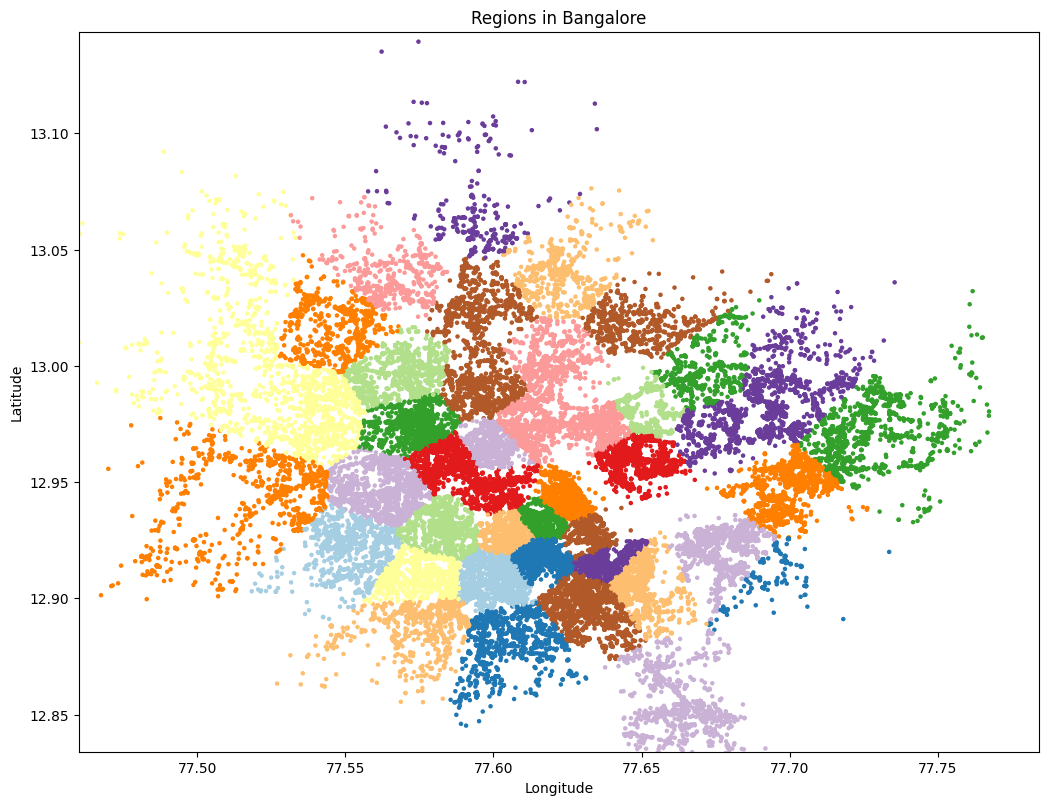

In [29]:
### These pickup clusters tell in which area most ride requests are coming.
### Plotting Regions in Bangalore (our most rides requests here)
#### Bangalore:'boundingbox': ['12.8340125', '13.1436649', '77.4601025', '77.7840515']
bangalore_latitude_range = (12.8340125, 13.1436649)
bangalore_longitude_range = (77.4601025, 77.7840515)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.scatter(x = df.pick_lng.values[:100000], y = df.pick_lat.values[:100000], c = df.pickup_cluster.values[:100000], cmap = "Paired", s = 5)
ax.set_xlim(77.4601025, 77.7840515)
ax.set_ylim(12.8340125, 13.1436649)
ax.set_title("Regions in Bangalore")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()
#Longitude values vary from left to right i.e., horizontally
#Latitude values vary from top to bottom means i.e., vertically

In [30]:
df.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min,pickup_cluster
0,2020-10-10 07:34:16,-1.0,12.975773,77.57107,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254,15
1,2020-10-11 08:23:42,-1.0,12.930813,77.60953,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489,28
2,2020-10-11 11:57:17,-1.0,12.960213,77.58746,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213,24
3,2020-10-16 17:51:07,-1.0,12.924353,77.54941,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553,3
4,2020-10-30 09:00:44,-1.0,12.945731,77.62250,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629,30


In [31]:
def round_timestamp_30interval(x):
    if type(x)==str:
        x = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return x- timedelta(minutes=x.minute%30, seconds=x.second, microseconds=x.microsecond)

df['ts'] = np.vectorize(round_timestamp_30interval)(df['ts'])

In [32]:
dataset = deepcopy(df)
dataset.ts = pd.to_datetime(dataset.ts)
dataset

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min,pickup_cluster
0,2020-10-10 07:30:00,-1.0,12.975773,77.571070,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254,15
1,2020-10-11 08:00:00,-1.0,12.930813,77.609530,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489,28
2,2020-10-11 11:30:00,-1.0,12.960213,77.587460,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213,24
3,2020-10-16 17:30:00,-1.0,12.924353,77.549410,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553,3
4,2020-10-30 09:00:00,-1.0,12.945731,77.622500,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708324,2021-02-12 19:30:00,99999.0,13.029848,77.593400,13.063751,77.589850,3.77,19,37,12,2,2021,4,1613158631,24,1498,48
3708325,2021-02-19 20:30:00,99999.0,13.029296,77.592580,12.927923,77.627106,11.82,20,43,19,2,2021,4,1613767405,169,10146,48
3708326,2021-02-20 17:30:00,99999.0,12.907576,77.600685,12.925874,77.607620,2.16,17,34,20,2,2021,5,1613842485,20,1251,1
3708327,2021-02-27 08:00:00,99999.0,12.956665,77.521870,12.948099,77.562990,4.56,8,26,27,2,2021,5,1614414383,158,9531,29


In [33]:
dataset = dataset[['ts','number','pickup_cluster']]

In [34]:
dataset=dataset.groupby(by = ['ts','pickup_cluster']).count().reset_index()
dataset.columns = ['ts','pickup_cluster','request_count']

In [35]:
dataset

,ts,pickup_cluster,request_count
0,2020-03-26 01:00:00,13,3
1,2020-03-26 01:00:00,16,1
2,2020-03-26 01:30:00,9,2
3,2020-03-26 01:30:00,13,1
4,2020-03-26 02:00:00,23,1
...,...,...,...
549982,2021-03-26 23:30:00,45,5
549983,2021-03-26 23:30:00,46,4
549984,2021-03-26 23:30:00,47,2
549985,2021-03-26 23:30:00,48,1


In [36]:
## Adding Dummy pickup cluster -1

## Change this Data based on your data
l = [datetime(2020,3,26,00,00,00) + timedelta(minutes = 30*i) for i in range(0,48*365)]
lt = []
for x in l:
    lt.append([x, -1, 0])
temp = pd.DataFrame(lt, columns = ['ts','pickup_cluster','request_count'])
dataset = dataset.append(temp,ignore_index=True)

<ipython-input-36-e47ebeb3ab4d>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(temp,ignore_index=True)


In [37]:
data = dataset.set_index(['ts', 'pickup_cluster']).unstack().fillna(value=0).asfreq(freq='30Min').stack().sort_index(level=1).reset_index()

In [38]:
# Removing Dummy Cluster
data = data[data.pickup_cluster>=0]

In [39]:
assert len(data)==878400

In [40]:
data['mins'] = data.ts.dt.minute
data['hour'] = data.ts.dt.hour
data['day'] = data.ts.dt.day
data['month'] = data.ts.dt.month
data['dayofweek'] = data.ts.dt.dayofweek
data['quarter'] = data.ts.dt.quarter

In [41]:
data

,ts,pickup_cluster,request_count,mins,hour,day,month,dayofweek,quarter
17568,2020-03-26 00:00:00,0,0.0,0,0,26,3,3,1
17569,2020-03-26 00:30:00,0,0.0,30,0,26,3,3,1
17570,2020-03-26 01:00:00,0,0.0,0,1,26,3,3,1
17571,2020-03-26 01:30:00,0,0.0,30,1,26,3,3,1
17572,2020-03-26 02:00:00,0,0.0,0,2,26,3,3,1
...,...,...,...,...,...,...,...,...,...
895963,2021-03-26 21:30:00,49,12.0,30,21,26,3,4,1
895964,2021-03-26 22:00:00,49,9.0,0,22,26,3,4,1
895965,2021-03-26 22:30:00,49,8.0,30,22,26,3,4,1
895966,2021-03-26 23:00:00,49,9.0,0,23,26,3,4,1


In [42]:
data.to_csv('/content/drive/MyDrive/ola/Data_prepared.csv',index = False, compression = 'gzip')

In [43]:
profile = data.profile_report(title='Ride Request DataSet Analysis')
profile.to_file(output_file="data_analysis_ride_request.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
profile